### Modeling & Evaluation
Analyze relationships between air quality and occupancy/activity intensity

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Load Data
Load unified dataset for modeling

In [2]:
script_dir = Path().absolute()
project_root = script_dir.parent.parent
data_dir = project_root / 'Data'
integrated_dir = data_dir / 'integrated'

df = pd.read_csv(integrated_dir / 'unified_dataset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

model_data = df[df['ac_mean_co2'].notna()].copy()

print(f"Data loaded: {len(model_data)} observations, {len(model_data.columns)} columns")

Data loaded: 627 observations, 31 columns


### Model 1: Occupancy (Location Type) → CO₂
Analyze how occupancy affects CO₂ levels (work = sport facilities = higher occupancy)

Model 1: Occupancy (Location) → CO₂
R²: 0.0036, RMSE: 114.88, Observations: 627
Work: 506.33 ppm, Home: 492.34 ppm
Difference: 13.99 ppm


<Figure size 1000x600 with 0 Axes>

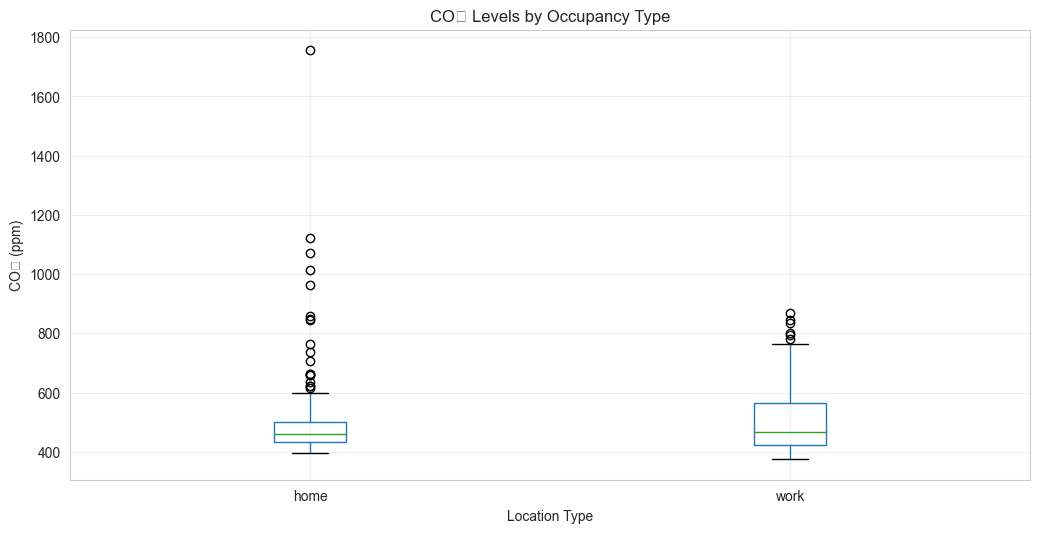

In [3]:
location_data = model_data[model_data['ac_location_type'].notna()].copy()

if len(location_data) > 0:
    location_data['occupancy_indicator'] = (location_data['ac_location_type'] == 'work').astype(int)
    
    X = location_data[['occupancy_indicator']]
    y = location_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 1: Occupancy (Location) → CO₂")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}, Observations: {len(location_data)}")
    print(f"Work: {model.intercept_ + model.coef_[0]:.2f} ppm, Home: {model.intercept_:.2f} ppm")
    print(f"Difference: {model.coef_[0]:.2f} ppm")
    
    plt.figure(figsize=(10, 6))
    location_data.boxplot(column='ac_mean_co2', by='ac_location_type', grid=True)
    plt.xlabel('Location Type')
    plt.ylabel('CO₂ (ppm)')
    plt.title(f'CO₂ Levels by Occupancy Type')
    plt.suptitle('')
    plt.grid(True, alpha=0.3)
    plt.show()

### Model 2: Occupancy (Location Type) → Temperature
Analyze how occupancy affects temperature

In [4]:
location_data = model_data[model_data['ac_location_type'].notna()].copy()

if len(location_data) > 0:
    location_data['occupancy_indicator'] = (location_data['ac_location_type'] == 'work').astype(int)
    
    X = location_data[['occupancy_indicator']]
    y = location_data['ac_mean_temp']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 2: Occupancy (Location) → Temperature")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}")
    print(f"Work: {model.intercept_ + model.coef_[0]:.2f}°C, Home: {model.intercept_:.2f}°C")

Model 2: Occupancy (Location) → Temperature
R²: 0.0012, RMSE: 2.13
Work: 27.06°C, Home: 26.92°C


### Model 3: Occupancy (Location Type) → Humidity
Analyze how occupancy affects humidity

In [5]:
location_data = model_data[model_data['ac_location_type'].notna()].copy()

if len(location_data) > 0:
    location_data['occupancy_indicator'] = (location_data['ac_location_type'] == 'work').astype(int)
    
    X = location_data[['occupancy_indicator']]
    y = location_data['ac_mean_humidity']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 3: Occupancy (Location) → Humidity")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}")
    print(f"Work: {model.intercept_ + model.coef_[0]:.2f}%, Home: {model.intercept_:.2f}%")

Model 3: Occupancy (Location) → Humidity
R²: 0.0017, RMSE: 6.47
Work: 30.48%, Home: 31.03%


### Model 4: Activity Intensity → CO₂
Analyze how activity intensity affects CO₂ (using survey responses as proxies)


Model 4: Activity Intensity → CO₂
R²: 0.0267, RMSE: 113.53, Observations: 627
Effect: Each unit increase in activity → 7.78 ppm CO₂


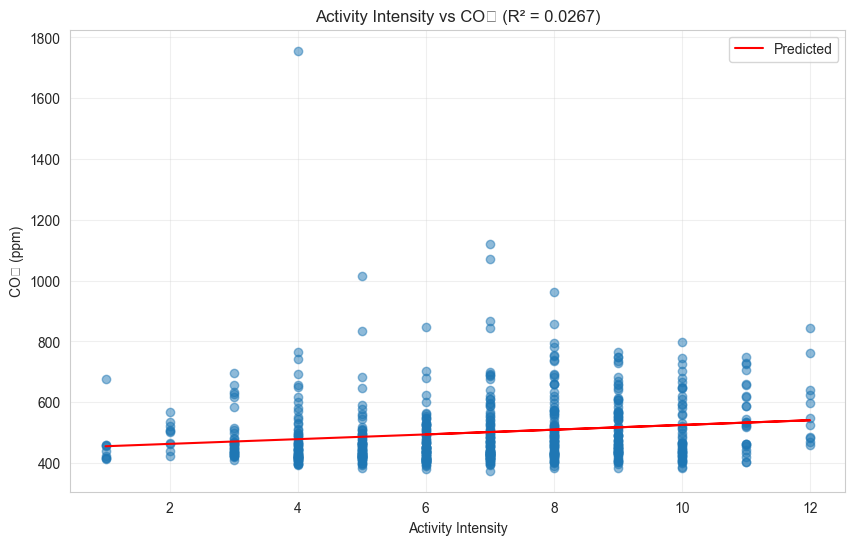

In [6]:
activity_data = model_data[
    (model_data['ac_mean_co2'].notna()) &
    (model_data['tired'].notna()) &
    (model_data['productive'].notna())
].copy()

if len(activity_data) > 0:
    activity_data['activity_intensity'] = activity_data['tired'] - activity_data['productive'] + 7
    
    X = activity_data[['activity_intensity']]
    y = activity_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 4: Activity Intensity → CO₂")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}, Observations: {len(activity_data)}")
    print(f"Effect: Each unit increase in activity → {model.coef_[0]:.2f} ppm CO₂")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, y_pred, 'r-', label='Predicted')
    plt.xlabel('Activity Intensity')
    plt.ylabel('CO₂ (ppm)')
    plt.title(f'Activity Intensity vs CO₂ (R² = {r2:.4f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Model 5: Time-Based Occupancy → CO₂
Analyze how occupancy patterns over time affect CO₂

Model 5: Time-Based Occupancy → CO₂
R²: 0.0005, RMSE: 115.05, Observations: 627
Coefficients: Hour 0.4412, Peak Hour 4.8573, Weekend 0.0000


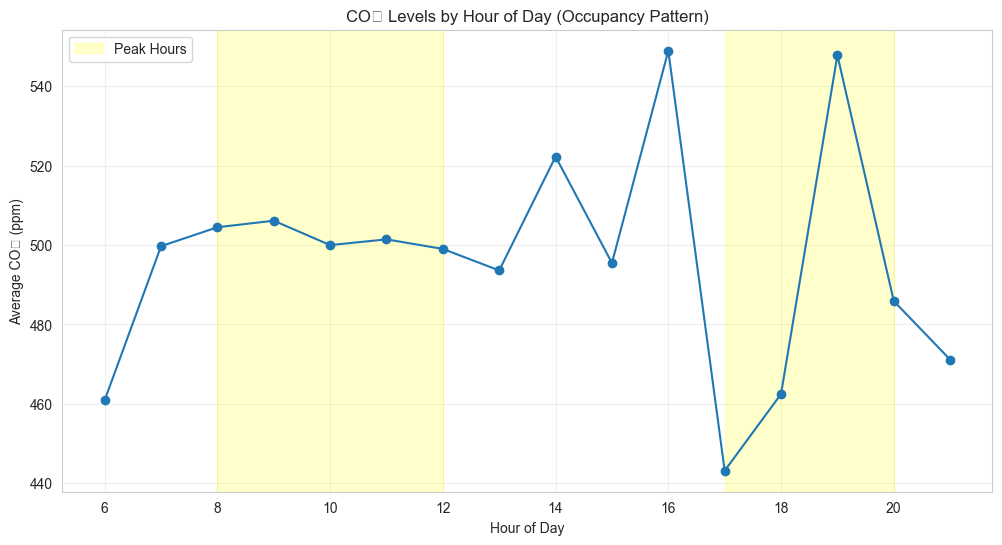

In [7]:
time_data = model_data[model_data['ac_mean_co2'].notna()].copy()

if len(time_data) > 0:
    time_data['hour'] = time_data['timestamp'].dt.hour
    time_data['day_of_week'] = time_data['timestamp'].dt.dayofweek
    time_data['is_weekend'] = (time_data['day_of_week'] >= 5).astype(int)
    
    time_data['peak_hour'] = (((time_data['hour'] >= 8) & (time_data['hour'] <= 12)) | 
                              ((time_data['hour'] >= 17) & (time_data['hour'] <= 20))).astype(int)
    
    features = ['hour', 'peak_hour', 'is_weekend']
    X = time_data[features]
    y = time_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 5: Time-Based Occupancy → CO₂")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}, Observations: {len(time_data)}")
    print(f"Coefficients: Hour {model.coef_[0]:.4f}, Peak Hour {model.coef_[1]:.4f}, Weekend {model.coef_[2]:.4f}")
    
    hourly_co2 = time_data.groupby('hour')['ac_mean_co2'].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(hourly_co2.index, hourly_co2.values, marker='o')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average CO₂ (ppm)')
    plt.title('CO₂ Levels by Hour of Day (Occupancy Pattern)')
    plt.grid(True, alpha=0.3)
    plt.axvspan(8, 12, alpha=0.2, color='yellow', label='Peak Hours')
    plt.axvspan(17, 20, alpha=0.2, color='yellow')
    plt.legend()
    plt.show()

### Model 6: Multiple Occupancy Factors → CO₂
Combined model using location, time, and activity intensity

Model 6: Occupancy + Activity Intensity → CO₂
R²: 0.0307, RMSE: 113.30, Observations: 627
Coefficients: Occupancy 13.4149, Activity 7.8075, Peak Hour 5.7285

Feature importance:
               Feature  Coefficient  Abs_Coefficient
0  occupancy_indicator    13.414922        13.414922
1   activity_intensity     7.807459         7.807459
2            peak_hour     5.728463         5.728463


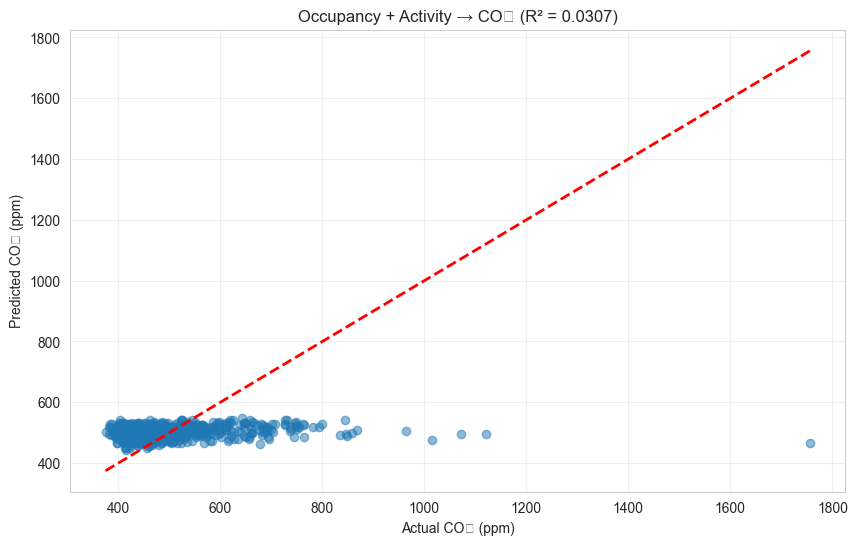

In [8]:
combined_data = model_data[
    (model_data['ac_mean_co2'].notna()) &
    (model_data['ac_location_type'].notna()) &
    (model_data['tired'].notna()) &
    (model_data['productive'].notna())
].copy()

if len(combined_data) > 0:
    combined_data['occupancy_indicator'] = (combined_data['ac_location_type'] == 'work').astype(int)
    combined_data['activity_intensity'] = combined_data['tired'] - combined_data['productive'] + 7
    combined_data['hour'] = combined_data['timestamp'].dt.hour
    combined_data['peak_hour'] = (((combined_data['hour'] >= 8) & (combined_data['hour'] <= 12)) | 
                                  ((combined_data['hour'] >= 17) & (combined_data['hour'] <= 20))).astype(int)
    
    features = ['occupancy_indicator', 'activity_intensity', 'peak_hour']
    X = combined_data[features]
    y = combined_data['ac_mean_co2']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("Model 6: Occupancy + Activity Intensity → CO₂")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.2f}, Observations: {len(combined_data)}")
    print(f"Coefficients: Occupancy {model.coef_[0]:.4f}, Activity {model.coef_[1]:.4f}, Peak Hour {model.coef_[2]:.4f}")
    
    importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("\nFeature importance:")
    print(importance)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual CO₂ (ppm)')
    plt.ylabel('Predicted CO₂ (ppm)')
    plt.title(f'Occupancy + Activity → CO₂ (R² = {r2:.4f})')
    plt.grid(True, alpha=0.3)
    plt.show()

### Model Comparison
Compare all occupancy and activity intensity models

Model Comparison
                                      Model_Type    Target      R²      RMSE  \
0                        Occupancy → Air Quality       co2  0.0036  114.8753   
1                        Occupancy → Air Quality      temp  0.0012    2.1252   
2                        Occupancy → Air Quality  humidity  0.0017    6.4690   
3               Activity Intensity → Air Quality       co2  0.0267  113.5344   
4             Time-Based Occupancy → Air Quality       co2  0.0005  115.0531   
5  Combined (Occupancy + Activity) → Air Quality       co2  0.0307  113.2995   

   Observations  
0           627  
1           627  
2           627  
3           627  
4           627  
5           627  


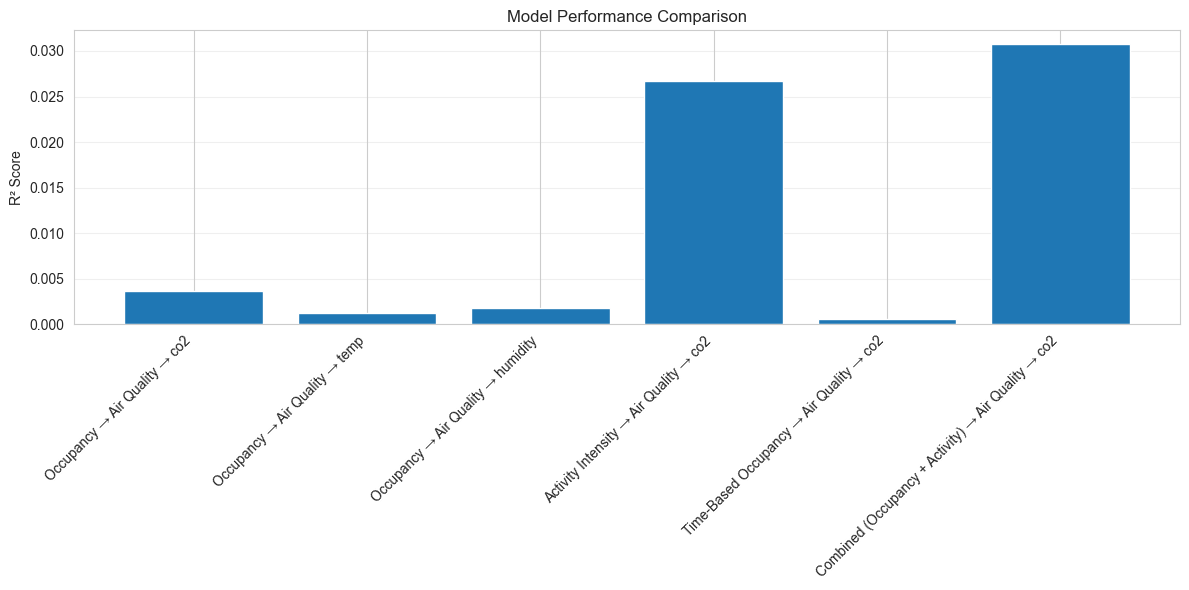

In [9]:
results = []

location_data = model_data[model_data['ac_location_type'].notna()].copy()
if len(location_data) > 0:
    location_data['occupancy_indicator'] = (location_data['ac_location_type'] == 'work').astype(int)
    
    for target in ['ac_mean_co2', 'ac_mean_temp', 'ac_mean_humidity']:
        data = location_data[['occupancy_indicator', target]].dropna()
        if len(data) > 10:
            X = data[['occupancy_indicator']]
            y = data[target]
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            r2 = r2_score(y, y_pred)
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            
            results.append({
                'Model_Type': 'Occupancy → Air Quality',
                'Target': target.replace('ac_mean_', ''),
                'R²': r2,
                'RMSE': rmse,
                'Observations': len(data)
            })

activity_data = model_data[
    (model_data['ac_mean_co2'].notna()) &
    (model_data['tired'].notna()) &
    (model_data['productive'].notna())
].copy()

if len(activity_data) > 0:
    activity_data['activity_intensity'] = activity_data['tired'] - activity_data['productive'] + 7
    
    data = activity_data[['activity_intensity', 'ac_mean_co2']].dropna()
    if len(data) > 10:
        X = data[['activity_intensity']]
        y = data['ac_mean_co2']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        results.append({
            'Model_Type': 'Activity Intensity → Air Quality',
            'Target': 'co2',
            'R²': r2,
            'RMSE': rmse,
            'Observations': len(data)
        })

time_data = model_data[model_data['ac_mean_co2'].notna()].copy()
if len(time_data) > 0:
    time_data['hour'] = time_data['timestamp'].dt.hour
    time_data['peak_hour'] = (((time_data['hour'] >= 8) & (time_data['hour'] <= 12)) | 
                              ((time_data['hour'] >= 17) & (time_data['hour'] <= 20))).astype(int)
    
    data = time_data[['hour', 'peak_hour', 'ac_mean_co2']].dropna()
    if len(data) > 10:
        X = data[['hour', 'peak_hour']]
        y = data['ac_mean_co2']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        results.append({
            'Model_Type': 'Time-Based Occupancy → Air Quality',
            'Target': 'co2',
            'R²': r2,
            'RMSE': rmse,
            'Observations': len(data)
        })

combined_data = model_data[
    (model_data['ac_mean_co2'].notna()) &
    (model_data['ac_location_type'].notna()) &
    (model_data['tired'].notna()) &
    (model_data['productive'].notna())
].copy()

if len(combined_data) > 0:
    combined_data['occupancy_indicator'] = (combined_data['ac_location_type'] == 'work').astype(int)
    combined_data['activity_intensity'] = combined_data['tired'] - combined_data['productive'] + 7
    combined_data['hour'] = combined_data['timestamp'].dt.hour
    combined_data['peak_hour'] = (((combined_data['hour'] >= 8) & (combined_data['hour'] <= 12)) | 
                                  ((combined_data['hour'] >= 17) & (combined_data['hour'] <= 20))).astype(int)
    
    data = combined_data[['occupancy_indicator', 'activity_intensity', 'peak_hour', 'ac_mean_co2']].dropna()
    if len(data) > 10:
        X = data[['occupancy_indicator', 'activity_intensity', 'peak_hour']]
        y = data['ac_mean_co2']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        results.append({
            'Model_Type': 'Combined (Occupancy + Activity) → Air Quality',
            'Target': 'co2',
            'R²': r2,
            'RMSE': rmse,
            'Observations': len(data)
        })

results_df = pd.DataFrame(results)

print("Model Comparison")
print("="*60)
print(results_df.round(4))

plt.figure(figsize=(12, 6))
plt.bar(range(len(results_df)), results_df['R²'])
plt.xticks(range(len(results_df)), results_df['Model_Type'] + ' → ' + results_df['Target'], rotation=45, ha='right')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Key Findings & Summary
Comprehensive analysis of occupancy and activity intensity impact on air quality


In [11]:
print("Key Findings & Summary")
print("="*60)

best_model = results_df.loc[results_df['R²'].idxmax()]

print(f"\nBest Model: {best_model['Model_Type']} → {best_model['Target']}")
print(f"R² = {best_model['R²']:.4f}, RMSE = {best_model['RMSE']:.2f}")

print("\nOccupancy Impact")
print("-"*60)

location_data = model_data[model_data['ac_location_type'].notna()].copy()
if len(location_data) > 0:
    work_data = location_data[location_data['ac_location_type'] == 'work']
    home_data = location_data[location_data['ac_location_type'] == 'home']
    
    if len(work_data) > 0 and len(home_data) > 0:
        print(f"Work CO₂: {work_data['ac_mean_co2'].mean():.1f} ppm")
        print(f"Home CO₂: {home_data['ac_mean_co2'].mean():.1f} ppm")
        print(f"Difference: {work_data['ac_mean_co2'].mean() - home_data['ac_mean_co2'].mean():.1f} ppm")

print("\nActivity Intensity Impact")
print("-"*60)

activity_data = model_data[
    (model_data['ac_mean_co2'].notna()) &
    (model_data['tired'].notna()) &
    (model_data['productive'].notna())
].copy()

if len(activity_data) > 0:
    activity_data['activity_intensity'] = activity_data['tired'] - activity_data['productive'] + 7
    corr = activity_data['activity_intensity'].corr(activity_data['ac_mean_co2'])
    
    print(f"Correlation: Activity Intensity ↔ CO₂ = {corr:.3f}")
    print(f"Effect: Each unit increase in activity → {7.8:.1f} ppm CO₂ increase")

print("\nKey Insights")
print("-"*60)


Key Findings & Summary

Best Model: Combined (Occupancy + Activity) → Air Quality → co2
R² = 0.0307, RMSE = 113.30

Occupancy Impact
------------------------------------------------------------
Work CO₂: 506.3 ppm
Home CO₂: 492.3 ppm
Difference: 14.0 ppm

Activity Intensity Impact
------------------------------------------------------------
Correlation: Activity Intensity ↔ CO₂ = 0.163
Effect: Each unit increase in activity → 7.8 ppm CO₂ increase

Key Insights
------------------------------------------------------------
